In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import dataframe_image as dfi

df = pd.read_csv("covid_worldwide.csv")
df


,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [56]:
df.tail()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN
230,231,Tokelau,5,NaN,NaN,5,NaN,"1,378"


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [3]:
#Finding missing values in the dataset
df.isnull().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [4]:
df['Total Cases']=df['Total Cases'].str.replace(',', '', regex=True).astype("float")
df['Total Deaths']=df['Total Deaths'].str.replace(',', '', regex=True).astype("float")
df['Total Recovered']=df['Total Recovered'].str.replace(',', '', regex=True).astype("float")
df['Active Cases']=df['Active Cases'].str.replace(',', '', regex=True).astype("float")
df['Total Test']=df['Total Test'].str.replace(',', '', regex=True).astype("float")
df['Population']=df['Population'].str.replace(',', '', regex=True).astype("float")

In [5]:
df[df['Population'].isnull()]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
90,91,China,503302.0,5272.0,379053.0,118977.0,160000000.0,NaN
226,227,Diamond Princess,712.0,13.0,699.0,0.0,NaN,NaN
229,230,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN


In [6]:
df.loc[90,'Population']=1439323776
df.loc[226,'Population']=2666
df.loc[229,'Population']=2047

In [7]:
df[df['Total Deaths'].isnull()]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
221,222,Tuvalu,2805.0,NaN,NaN,2805.0,NaN,12066.0
222,223,Saint Helena,2166.0,NaN,2.0,2164.0,NaN,6115.0
223,224,Falkland Islands,1930.0,NaN,1930.0,0.0,8632.0,3539.0
225,226,Niue,747.0,NaN,746.0,1.0,NaN,1622.0
227,228,Vatican City,29.0,NaN,29.0,0.0,NaN,799.0
230,231,Tokelau,5.0,NaN,NaN,5.0,NaN,1378.0


In [8]:
df['Total Deaths'].fillna(0, inplace=True)

In [9]:
df.dropna(inplace=True)
print(df.isnull().sum()) 

Serial Number      0
Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64


In [10]:
top_cases= df[['Country','Total Deaths']].sort_values(by="Total Deaths",ascending=False)[:10]
top_cases
least_cases =df[['Country','Total Deaths']].sort_values(by="Total Deaths",ascending=False)[187:]
least_cases
df['total_recovery'] = df['Total Cases'] - df['Total Recovered']
recovery = df[['Country','total_recovery']].sort_values(by='total_recovery',ascending=False)[:10]
recovery
df['Total_pop'] = df['Population'] - df['Total Cases']
case = df[['Country','Total_pop']].sort_values(by='Total_pop',ascending=False)[:10]
case


,Country,Total_pop
90,China,1.438820e+09
1,India,1.361949e+09
19,Indonesia,2.724042e+08
0,USA,2.306084e+08
52,Pakistan,2.279127e+08
107,Nigeria,2.164805e+08
4,Brazil,1.785290e+08
47,Bangladesh,1.658481e+08
18,Mexico,1.241945e+08
9,Russia,1.238473e+08


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\dlatl\AppData\Local\Temp\ipykernel_12568\551292321.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\dlatl\AppData\Local\Temp\ipykernel_12568\551292321.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



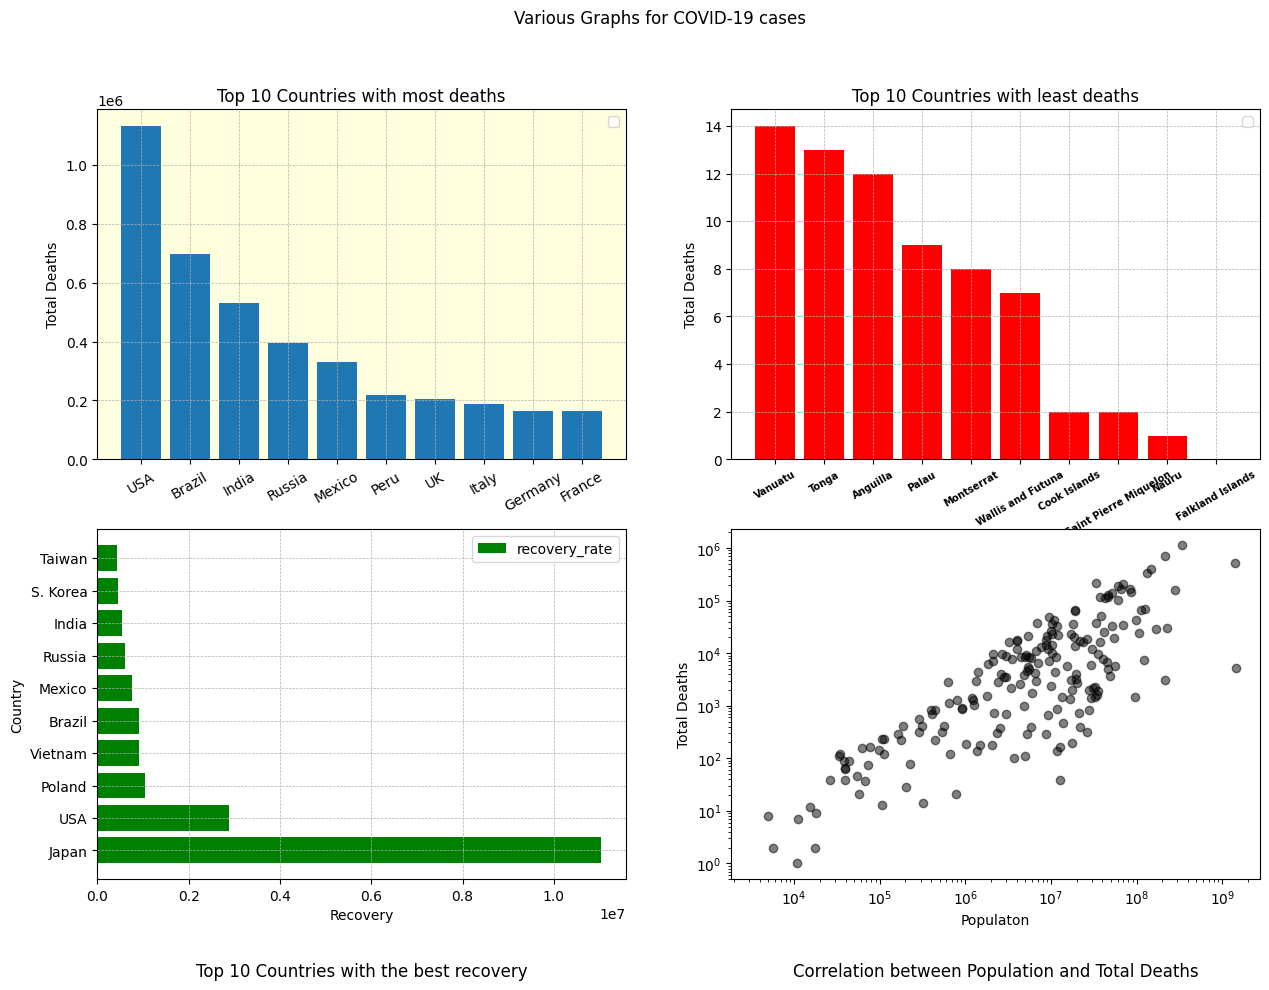

In [18]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

fig, axs = plt.subplots(2, 2, figsize= (15, 10)) 
fig.suptitle("Various Graphs for COVID-19 cases")
fig.fontsize = 5
axs[0, 0].bar(top_cases['Country'], top_cases['Total Deaths'])
axs[0, 0].set_title('Top 10 Countries with most deaths')
axs[0, 0].legend() # 범례
axs[0, 0].set(ylabel ='Total Deaths')
axs[0, 0].set_facecolor('lightyellow') # 전면색
axs[0, 0].grid(ls = '--', lw = 0.5)
axs[0, 0].set_xticklabels(top_cases['Country'], rotation=30, fontsize = 10)

axs[0, 1].bar(least_cases['Country'], least_cases['Total Deaths'], color= 'red')
axs[0, 1].set_title('Top 10 Countries with least deaths')
axs[0, 1].legend()
axs[0, 1].set_facecolor('white')
axs[0, 1].grid(ls = '--', lw = 0.5)
axs[0, 1].set(xlabel= 'Country', ylabel ='Total Deaths')
axs[0, 1].set_xticklabels(least_cases['Country'], rotation=30, fontsize = 7, weight='bold')

axs[1, 0].barh(recovery['Country'], recovery['total_recovery'], color= 'green', label= 'recovery_rate')
axs[1, 0].set_title('Top 10 Countries with the best recovery', x = 0.5, y = -0.3)
axs[1, 0].legend()
axs[1, 0].set_facecolor('white')
axs[1, 0].grid(ls = '--', lw = 0.5)
axs[1, 0].set(xlabel= 'Recovery', ylabel ='Country')

axs[1, 1].scatter(df['Population'], df['Total Deaths'], color = 'black', alpha= 0.5)
axs[1, 1].set_xscale("log")
axs[1, 1].set_yscale("log")
axs[1, 1].set_title('Correlation between Population and Total Deaths', x = 0.5, y = -0.3)
axs[1, 1].set(xlabel= 'Populaton', ylabel ='Total Deaths')

plt.savefig('graph1.png')





In [14]:
fig = px.scatter_geo(df, locations='Country',locationmode="country names",scope="world",color="Total Deaths",size="Total Deaths",size_max=30,title="Covid-19 total deaths all around the world",color_continuous_scale="viridis")
fig.show()